In [101]:
# Implemented by Mohammad Sadegh Salehi
# mohammadsadeghsalehi.github.io
# Email: mss226@bath.ac.uk
# Date: 2022-04-26
# Description: This file contains the code for numerical experiments of the overparametrisation based on the paper https://doi.org/10.48550/arXiv.1802.06509
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
device ="cpu"

In [102]:
# Load the data

#Transform values from [0,1] to [-1,1]
transform   = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

#trainset    = datasets.MNIST('train', download = True, train = True , transform = transform)
trainset    = datasets.FashionMNIST('train', download = True, train = True , transform = transform)
trainset = torch.utils.data.Subset(trainset, list(range(0,10000)))
#valset      = datasets.MNIST('val  ', download = True, train = False, transform = transform)
valset      = datasets.FashionMNIST('val', download = True, train = False, transform = transform)
valset = torch.utils.data.Subset(valset, list(range(0,10000)))
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
valloader   = torch.utils.data.DataLoader(valset  , batch_size = 64, shuffle = True)

dataiter = iter(trainloader)
X, y = dataiter.next()

print(X.shape)
print(y.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [103]:
# Defining the structure of Network
# three layers
# the first hidden layer : 128
# the second hidden layer : 64
input_size   = 28*28
hidden_sizes = [128, 64]
output_size  = 10

sizes = [input_size] + hidden_sizes
#activation function l1 = relu, l2 = relu, l3 = softmax
# layers  = sum([[nn.Linear(start, end), nn.ReLU()] for start, end in zip(sizes, sizes[1:])], [])
# layers += [nn.Linear(sizes[-1], output_size), nn.LogSoftmax(dim = 1)]
layers  = sum([[nn.Linear(start, end)] for start, end in zip(sizes, sizes[1:])], [])
layers += [nn.Linear(sizes[-1], output_size)]

model = nn.Sequential(*layers).to(device)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=10, bias=True)
)


In [104]:
# model 2
# 4 linear layers
input_size   = 28*28
hidden_sizes = [128, 64, 32]
output_size  = 10

sizes = [input_size] + hidden_sizes
#activation function l1 = relu, l2 = relu, l3 = softmax
# layers  = sum([[nn.Linear(start, end), nn.ReLU()] for start, end in zip(sizes, sizes[1:])], [])
# layers += [nn.Linear(sizes[-1], output_size), nn.LogSoftmax(dim = 1)]
layers  = sum([[nn.Linear(start, end)] for start, end in zip(sizes, sizes[1:])], [])
layers += [nn.Linear(sizes[-1], output_size)]

model2 = nn.Sequential(*layers)

print(model2)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): Linear(in_features=32, out_features=10, bias=True)
)


In [105]:
# model 3
#2 linear layers
input_size   = 28*28
hidden_sizes = [128]
output_size  = 10

sizes = [input_size] + hidden_sizes
#activation function l1 = relu, l2 = relu, l3 = softmax
# layers  = sum([[nn.Linear(start, end), nn.ReLU()] for start, end in zip(sizes, sizes[1:])], [])
# layers += [nn.Linear(sizes[-1], output_size), nn.LogSoftmax(dim = 1)]
layers  = sum([[nn.Linear(start, end)] for start, end in zip(sizes, sizes[1:])], [])
layers += [nn.Linear(sizes[-1], output_size)]

model3 = nn.Sequential(*layers)

print(model3)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=10, bias=True)
)


In [106]:
# model 4
input_size   = 28*28
hidden_sizes = [128, 64,64,64,64,64,32]
output_size  = 10

sizes = [input_size] + hidden_sizes
#activation function l1 = relu, l2 = relu, l3 = softmax
# layers  = sum([[nn.Linear(start, end), nn.ReLU()] for start, end in zip(sizes, sizes[1:])], [])
# layers += [nn.Linear(sizes[-1], output_size), nn.LogSoftmax(dim = 1)]

layers  = sum([[nn.Linear(start, end)] for start, end in zip(sizes, sizes[1:])], [])
layers += [nn.Linear(sizes[-1], output_size)]
for i in range(len(layers)):
    nn.init.eye_(layers[i].weight)

model4 = nn.Sequential(*layers)

print(model4)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): Linear(in_features=64, out_features=64, bias=True)
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): Linear(in_features=64, out_features=64, bias=True)
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): Linear(in_features=32, out_features=10, bias=True)
)


In [107]:
# model 5
input_size   = 28*28
hidden_sizes = [128, 64,64,64,64,64,32]
output_size  = 10

sizes = [input_size] + hidden_sizes
#activation function l1 = relu, l2 = relu, l3 = softmax
# layers  = sum([[nn.Linear(start, end), nn.ReLU()] for start, end in zip(sizes, sizes[1:])], [])
# layers += [nn.Linear(sizes[-1], output_size), nn.LogSoftmax(dim = 1)]

layers  = sum([[nn.Linear(start, end)] for start, end in zip(sizes, sizes[1:])], [])
layers += [nn.Linear(sizes[-1], output_size)]
# for i in range(len(layers)):
#     nn.init.eye_(layers[i].weight)

model5 = nn.Sequential(*layers)

print(model5)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): Linear(in_features=64, out_features=64, bias=True)
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): Linear(in_features=64, out_features=64, bias=True)
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): Linear(in_features=32, out_features=10, bias=True)
)


In [108]:
# model 6
# 4 linear layers - identity initialization
input_size   = 28*28
hidden_sizes = [128, 64, 32]
output_size  = 10

sizes = [input_size] + hidden_sizes
#activation function l1 = relu, l2 = relu, l3 = softmax
# layers  = sum([[nn.Linear(start, end), nn.ReLU()] for start, end in zip(sizes, sizes[1:])], [])
# layers += [nn.Linear(sizes[-1], output_size), nn.LogSoftmax(dim = 1)]
layers  = sum([[nn.Linear(start, end)] for start, end in zip(sizes, sizes[1:])], [])
layers += [nn.Linear(sizes[-1], output_size)]
for i in range(len(layers)):
    nn.init.eye_(layers[i].weight)
model6 = nn.Sequential(*layers)

print(model6)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=64, bias=True)
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): Linear(in_features=32, out_features=10, bias=True)
)


In [109]:
# model 7
# 1 linear layer
input_size   = 28*28
hidden_sizes = []
output_size  = 10

sizes = [input_size] + hidden_sizes
#activation function l1 = relu, l2 = relu, l3 = softmax
# layers  = sum([[nn.Linear(start, end), nn.ReLU()] for start, end in zip(sizes, sizes[1:])], [])
# layers += [nn.Linear(sizes[-1], output_size), nn.LogSoftmax(dim = 1)]
layers  = sum([[nn.Linear(start, end)] for start, end in zip(sizes, sizes[1:])], [])
layers += [nn.Linear(sizes[-1], output_size)]

model7 = nn.Sequential(*layers)

print(model7)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
)


Epoch   1
Epoch   2
Epoch   3
Epoch   4
Epoch   5
Epoch   6
Epoch   7
Epoch   8
Epoch   9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Epoch  30
Epoch  31
Epoch  32
Epoch  33
Epoch  34
Epoch  35
Epoch  36
Epoch  37
Epoch  38
Epoch  39
Epoch  40
Epoch  41
Epoch  42
Epoch  43
Epoch  44
Epoch  45
Epoch  46
Epoch  47
Epoch  48
Epoch  49
Epoch  50
Epoch  51
Epoch  52
Epoch  53
Epoch  54
Epoch  55
Epoch  56
Epoch  57
Epoch  58
Epoch  59
Epoch  60
Epoch  61
Epoch  62
Epoch  63
Epoch  64
Epoch  65
Epoch  66
Epoch  67
Epoch  68
Epoch  69
Epoch  70
Epoch  71
Epoch  72
Epoch  73
Epoch  74
Epoch  75
Epoch  76
Epoch  77
Epoch  78
Epoch  79
Epoch  80
Epoch  81
Epoch  82
Epoch  83
Epoch  84
Epoch  85
Epoch  86
Epoch  87
Epoch  88
Epoch  89
Epoch  90
Epoch  91
Epoch  92
Epoch  93
Epoch  94
Epoch  95
Epoch  96
Epoch  97
Epoch  98
Epoch  99
Epoch 100


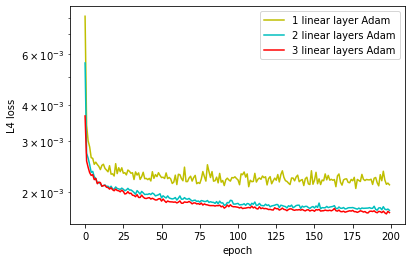

In [78]:
# Different numbers of linear layers using ADAM optimizer and L4 loss
# Optimisation

#3 layers
optimizer = optim.Adam(model.parameters(), lr = 1e-3)
# 1 layer
optimizer2 = optim.Adam(model7.parameters(), lr = 1e-3)
#2 layers
optimizer3 = optim.Adam(model3.parameters(), lr = 1e-3)


time0     = time()
epochs    = 200
Loss = []
Loss2 = []
Loss3 = []

def L4(output, target):
    loss = 0.25*torch.mean((output - target)**4)
    return loss
for e in range(1, epochs + 1):
    running_loss = 0
    running_loss2 = 0
    running_loss3 = 0

    for X, y in trainloader:
        # Flatten FasionMNIST images into a 784 long vector
        X = X.view(X.shape[0], -1)
        y = torch.nn.functional.one_hot(y, num_classes=10)
        y = y.type(torch.FloatTensor)

        # Training pass
        optimizer.zero_grad()
        optimizer2.zero_grad()
        optimizer3.zero_grad()

        output = model(X)
        #loss = nn.MSELoss()(output, y)
        loss = L4(output, y)
        output2 = model7(X)
        #loss2 = nn.MSELoss()(output2, y)
        loss2 = L4(output2, y)
        output3 = model3(X)
        #loss3 = nn.MSELoss()(output3, y)
        loss3 = L4(output3, y)

        #This is where the model learns by backpropagating
        loss.backward()
        loss2.backward()
        loss3.backward()

        #And optimizes its weights here
        optimizer.step()
        optimizer2.step()
        optimizer3.step()

        running_loss += loss.item()
        running_loss2 += loss2.item()
        running_loss3 += loss3.item()        

    Loss.append(running_loss / len(trainloader))
    Loss2.append(running_loss2 / len(trainloader))
    Loss3.append(running_loss3 / len(trainloader))

    print(f"Epoch {e:3d}")
plt.plot(Loss2,label='1 linear layer Adam',color = 'y')  
plt.plot(Loss3,label='2 linear layers Adam',color = 'c')
plt.plot(Loss,label='3 linear layers Adam',color='r')
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('L4 loss')
plt.legend()
    
m, s = map(int, divmod(time() - time0, 60))
if s == 60:
    m += 1
    s  = 0
print(f"\nTraining Time = {m:d}m {s:d}s")

Epoch   1
Epoch   2
Epoch   3
Epoch   4
Epoch   5
Epoch   6
Epoch   7
Epoch   8
Epoch   9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Epoch  30
Epoch  31
Epoch  32
Epoch  33
Epoch  34
Epoch  35
Epoch  36
Epoch  37
Epoch  38
Epoch  39
Epoch  40
Epoch  41
Epoch  42
Epoch  43
Epoch  44
Epoch  45
Epoch  46
Epoch  47
Epoch  48
Epoch  49
Epoch  50
Epoch  51
Epoch  52
Epoch  53
Epoch  54
Epoch  55
Epoch  56
Epoch  57
Epoch  58
Epoch  59
Epoch  60
Epoch  61
Epoch  62
Epoch  63
Epoch  64
Epoch  65
Epoch  66
Epoch  67
Epoch  68
Epoch  69
Epoch  70
Epoch  71
Epoch  72
Epoch  73
Epoch  74
Epoch  75
Epoch  76
Epoch  77
Epoch  78
Epoch  79
Epoch  80
Epoch  81
Epoch  82
Epoch  83
Epoch  84
Epoch  85
Epoch  86
Epoch  87
Epoch  88
Epoch  89
Epoch  90
Epoch  91
Epoch  92
Epoch  93
Epoch  94
Epoch  95
Epoch  96
Epoch  97
Epoch  98
Epoch  99
Epoch 100


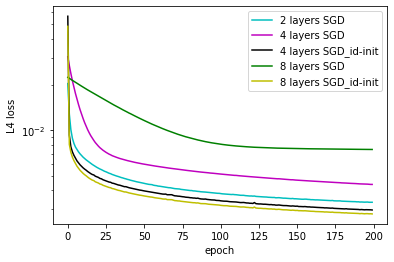

In [110]:
# Effect of initialisation
# Optimisation

#3 layers
#optimizer = optim.SGD(model.parameters(), lr = 1e-3)
# 8 layers- identity initialisation
optimizer2 = optim.SGD(model4.parameters(), lr = 1e-3)
#2 layers
optimizer3 = optim.SGD(model3.parameters(), lr = 1e-3)
# 8 layers
optimizer4 = optim.SGD(model5.parameters(), lr = 1e-3)
# 4 layers
optimizer5 = optim.SGD(model2.parameters(), lr = 1e-3)
# 4 layers - identity initialisation
optimizer6 = optim.SGD(model6.parameters(), lr = 1e-3)

time0     = time()
epochs    = 200
#Loss = []
Loss2 = []
Loss3 = []
Loss4 = []
Loss5 = []
Loss6 = []

def L4(output, target):
    loss = 0.25*torch.mean((output - target)**4)
    return loss
for e in range(1, epochs + 1):
    #running_loss = 0
    running_loss2 = 0
    running_loss3 = 0
    running_loss4 = 0
    running_loss5 = 0
    running_loss6 = 0

    for X, y in trainloader:
        # Flatten FasionMNIST images into a 784 long vector
        X = X.view(X.shape[0], -1)
        y = torch.nn.functional.one_hot(y, num_classes=10)
        y = y.type(torch.FloatTensor)

        # Training pass
        #optimizer.zero_grad()
        optimizer2.zero_grad()
        optimizer3.zero_grad()
        optimizer4.zero_grad()
        optimizer5.zero_grad()
        optimizer6.zero_grad()

        #output = model(X)
        #loss = nn.MSELoss()(output, y)
        #loss = L4(output, y)
        output2 = model4(X)
        #loss2 = nn.MSELoss()(output2, y)
        loss2 = L4(output2, y)
        output3 = model3(X)
        #loss3 = nn.MSELoss()(output3, y)
        loss3 = L4(output3, y)

        output4 = model5(X)
        #loss3 = nn.MSELoss()(output3, y)
        loss4 = L4(output4, y)

        output5 = model2(X)
        loss5 = L4(output5, y)

        output6 = model6(X)
        loss6 = L4(output6, y)
        #This is where the model learns by backpropagating
        #loss.backward()
        loss2.backward()
        loss3.backward()
        loss4.backward()
        loss5.backward()
        loss6.backward()


        #And optimizes its weights here
        #optimizer.step()
        optimizer2.step()
        optimizer3.step()
        optimizer4.step()
        optimizer5.step()
        optimizer6.step()

        #running_loss += loss.item()
        running_loss2 += loss2.item()
        running_loss3 += loss3.item() 
        running_loss4 += loss4.item()
        running_loss5 += loss5.item()
        running_loss6 += loss6.item()

    #Loss.append(running_loss / len(trainloader))
    Loss2.append(running_loss2 / len(trainloader))
    Loss3.append(running_loss3 / len(trainloader))
    Loss4.append(running_loss4 / len(trainloader))
    Loss5.append(running_loss5 / len(trainloader))
    Loss6.append(running_loss6 / len(trainloader))

    print(f"Epoch {e:3d}")
plt.plot(Loss3,label='2 layers SGD',color = 'c')
#plt.plot(Loss,label='3 layers SGD',color='r')
plt.plot(Loss5,label='4 layers SGD',color = 'm')
plt.plot(Loss6,label='4 layers SGD_id-init',color = 'k')
plt.plot(Loss4,label='8 layers SGD',color = 'g')
plt.plot(Loss2,label='8 layers SGD_id-init',color = 'y')  

plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('L4 loss')
plt.legend()
    
m, s = map(int, divmod(time() - time0, 60))
if s == 60:
    m += 1
    s  = 0
print(f"\nTraining Time = {m:d}m {s:d}s")

iteration   1
iteration   2
iteration   3
iteration   4
iteration   5
iteration   6
iteration   7
iteration   8
iteration   9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iteration  68
iteration  69
iteration  70
iteration  71
iterat

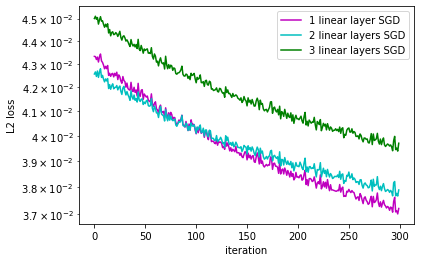

In [100]:
#L2 loss with SGD
trainset    = datasets.FashionMNIST('train', download = True, train = True , transform = transform)
trainset = torch.utils.data.Subset(trainset, list(range(0,5000)))
#valset      = datasets.FashionMNIST('val  ', download = True, train = False, transform = transform)
valset      = datasets.FashionMNIST('val', download = True, train = False, transform = transform)
valset = torch.utils.data.Subset(valset, list(range(0,5000)))
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
valloader   = torch.utils.data.DataLoader(valset  , batch_size = 64, shuffle = True)

dataiter = iter(trainloader)
X, y = dataiter.next()
# Optimisation
#3 layers
optimizer = optim.SGD(model.parameters(), lr = 1e-3)
# 1 layer
optimizer2 = optim.SGD(model7.parameters(), lr = 1e-3)
#2 layers
optimizer3 = optim.SGD(model3.parameters(), lr = 1e-3)
time0     = time()
iteration    = 300
Loss = []
Loss2 = []
Loss3 = []
for e in range(1, iteration + 1):
    running_loss = 0
    running_loss2 = 0
    running_loss3 = 0
    for X, y in trainloader:
        # Flatten FasionMNIST images into a 784 long vector
        X = X.view(X.shape[0], -1)
        y = torch.nn.functional.one_hot(y, num_classes=10)
        y = y.type(torch.FloatTensor)

        # Training pass
        optimizer.zero_grad()
        optimizer2.zero_grad()
        optimizer3.zero_grad()
        def loss_closure1():
            optimizer.zero_grad()
            oupt = model(X)
            loss_val = nn.MSELoss()(oupt, y)
            #loss_val = L4(oupt, y)
            loss_val.backward()
            return loss_val
        loss = loss_closure1()
        optimizer.step(loss_closure1)
        def loss_closure2():
            optimizer2.zero_grad()
            oupt = model7(X)
            loss_val = nn.MSELoss()(oupt, y)
            #loss_val = L4(oupt, y)
            loss_val.backward()
            return loss_val
        loss2 = loss_closure2()
        optimizer2.step(loss_closure2)
        def loss_closure3():
            optimizer3.zero_grad()
            oupt = model3(X)
            loss_val = nn.MSELoss()(oupt, y)
            #loss_val = L4(oupt, y)
            loss_val.backward()
            return loss_val
        loss3 = loss_closure3()
        optimizer3.step(loss_closure3)
        

        running_loss += loss.item()
        running_loss2 += loss2.item()
        running_loss3 += loss3.item()
    Loss.append(running_loss / len(trainloader))
    Loss2.append(running_loss2 / len(trainloader))
    Loss3.append(running_loss3 / len(trainloader))
    print(f"iteration {e:3d}")

plt.plot(Loss2,label='1 linear layer SGD',color = 'm')  
plt.plot(Loss3,label='2 linear layers SGD',color = 'c')
plt.plot(Loss,label='3 linear layers SGD',color='g')

plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('L2 loss')
plt.legend()
    
m, s = map(int, divmod(time() - time0, 60))
if s == 60:
    m += 1
    s  = 0
print(f"\nTraining Time = {m:d}m {s:d}s")

In [2]:
# Comparing dense layer with 2 linear layers instead of each dense layer
# model Nonlinear
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = tf.cast(tf.slice(train_images, [0, 0, 0,0], [5000, -1, -1, 3]), tf.float32)
train_labels = tf.cast(tf.slice(train_labels, [0, 0], [5000, -1]), tf.float32)

test_images = tf.cast(tf.slice(train_images, [0, 0, 0,0], [1000, -1, -1, 3]), tf.float32)
test_labels = tf.cast(tf.slice(train_labels, [0, 0], [1000, -1]), tf.float32)
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

## Model 2 with 2 linear layers instead of each dense layer
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
##
model2.add(layers.Dense(64))
model2.add(layers.Dense(64))
model2.add(layers.Dense(10))
model2.add(layers.Dense(10))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Epoch 1/100
157/157 [==============================] - 10s 62ms/step - loss: 118.9134 - mean_squared_error: 8.0216 - val_loss: 112.5813 - val_mean_squared_error: 8.0424
Epoch 2/100
157/157 [==============================] - 7s 46ms/step - loss: 118.6424 - mean_squared_error: 7.9693 - val_loss: 110.4271 - val_mean_squared_error: 7.9164
Epoch 3/100
157/157 [==============================] - 8s 49ms/step - loss: 109.6100 - mean_squared_error: 7.6809 - val_loss: 138.8251 - val_mean_squared_error: 8.2301
Epoch 4/100
157/157 [==============================] - 8s 49ms/step - loss: 99.9833 - mean_squared_error: 7.2831 - val_loss: 96.8976 - val_mean_squared_error: 7.3660
Epoch 5/100
157/157 [==============================] - 9s 58ms/step - loss: 99.9064 - mean_squared_error: 7.2446 - val_loss: 126.1545 - val_mean_squared_error: 7.8015
Epoch 6/100
157/157 [==============================] - 8s 51ms/step - loss: 92.5929 - mean_squared_error: 6.9576 - val_loss: 114.8324 - val_mean_squared_error: 7.

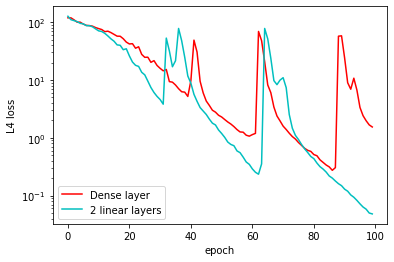

In [4]:
tf.config.run_functions_eagerly(True)

time0     = time()
epochs    = 100
def custom_loss_function(y_true, y_pred):
    squared_difference = tf.square(tf.square(y_true - y_pred))
    return tf.reduce_mean(squared_difference, axis=-1)

#tf.keras.losses.mean_squared_error
model.compile(optimizer='adam', loss = custom_loss_function, metrics=['MeanSquaredError'])
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

model2.compile(optimizer='adam', loss = custom_loss_function, metrics=['MeanSquaredError'])
history2 = model2.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

plt.plot(history.history['loss'], label='Dense layer', color = 'r')
plt.plot(history2.history['loss'], label='2 linear layers', color = 'c')
plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('L4 loss')
plt.legend()

    
m, s = map(int, divmod(time() - time0, 60))
if s == 60:
    m += 1
    s  = 0
print(f"\nTraining Time = {m:d}m {s:d}s")